In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('kdd_train.csv')
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune


In [3]:
df = pd.get_dummies(df, columns=['protocol_type','service','flag'])

In [4]:
df.head(50)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
1,0,146,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
2,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
3,0,232,8153,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
4,0,199,420,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
5,0,0,0,0,0,0,0,0,0,0,...,True,False,False,False,False,False,False,False,False,False
6,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
7,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
8,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
9,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False


In [5]:
df.shape

(125973, 123)

In [6]:
df.isnull().values.any()

np.False_

In [7]:
def check_corr(size):
    corr = df.corr(numeric_only=True)
    fig, ax=plt.subplots(figsize=(size,size))
    cmap='rainbow'
    ax.matshow(corr, cmap=cmap)
    plt.xticks(range(len(corr.columns)),corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)),corr.columns)
    plt.show()

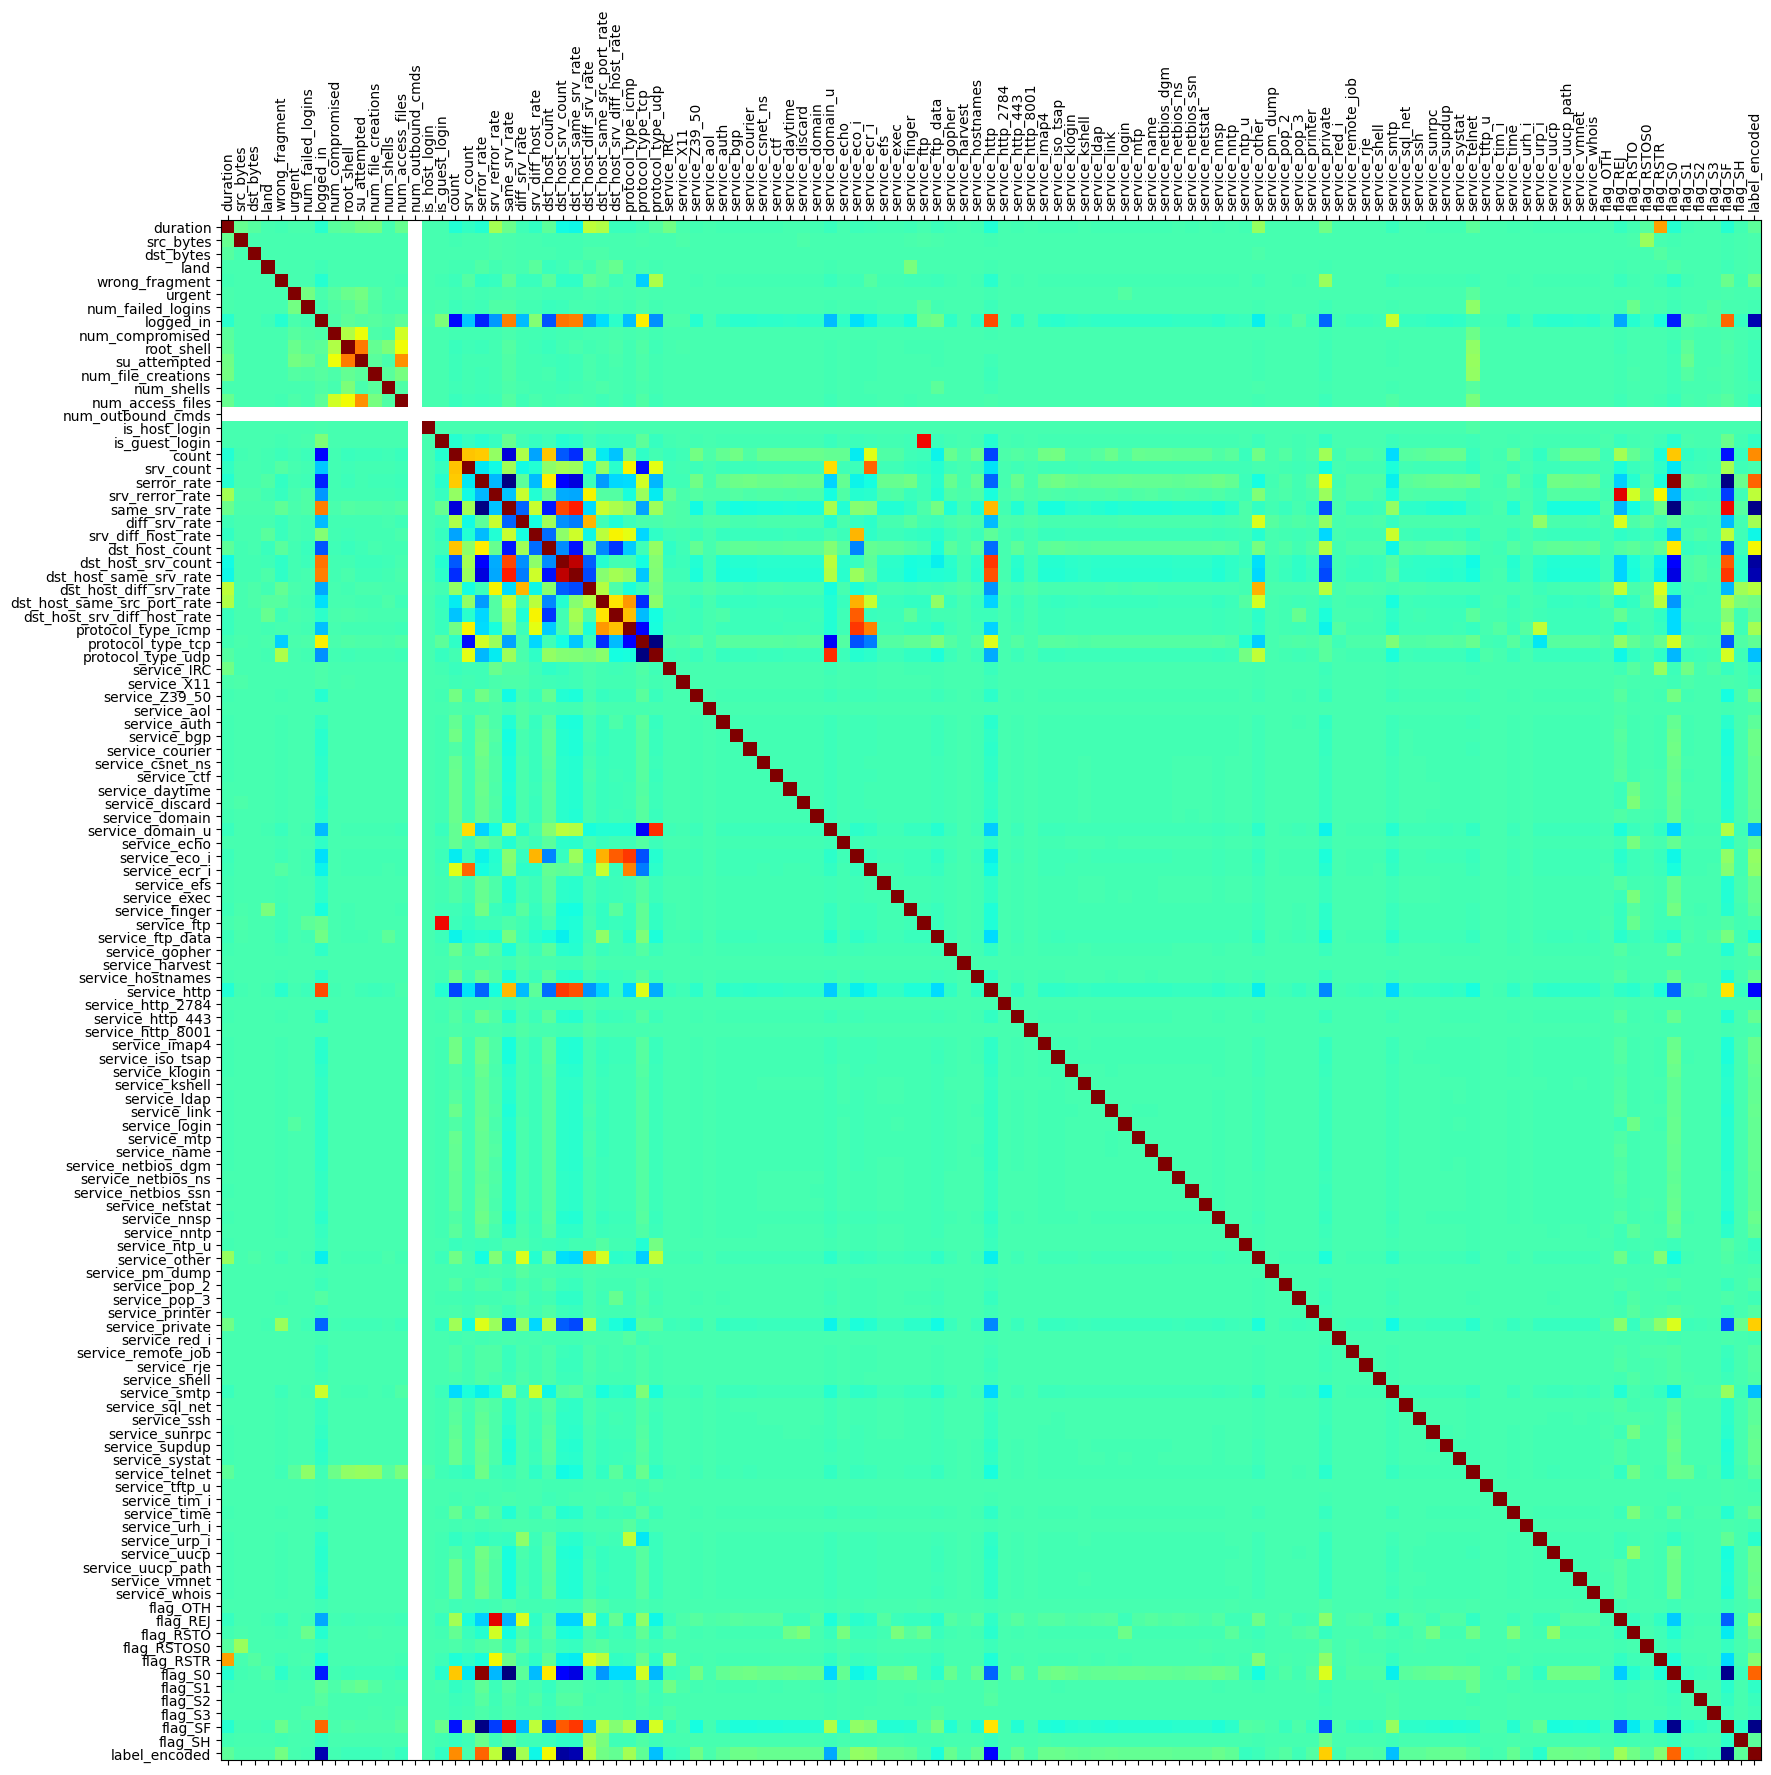

In [65]:
check_corr(20)

In [9]:
df.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       ...
       'flag_REJ', 'flag_RSTO', 'flag_RSTOS0', 'flag_RSTR', 'flag_S0',
       'flag_S1', 'flag_S2', 'flag_S3', 'flag_SF', 'flag_SH'],
      dtype='object', length=123)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Columns: 123 entries, duration to flag_SH
dtypes: bool(84), float64(15), int64(23), object(1)
memory usage: 47.6+ MB


In [11]:
df.duplicated().sum()


np.int64(0)

In [12]:
def get_correlated_columns(df, threshold=0.8):
    
    corr = df.corr(numeric_only=True).abs()

    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

    correlated_pairs = [
        (col, row, upper.loc[row, col])
        for col in upper.columns
        for row in upper.index
        if pd.notnull(upper.loc[row, col]) and upper.loc[row, col] > threshold
    ]

    return correlated_pairs

In [13]:
pairs = get_correlated_columns(df, 0.85)

for col1, col2, value in pairs:
    print(f"{col1}  <->  {col2}  =  {value:.2f}")


num_root  <->  num_compromised  =  1.00
is_guest_login  <->  hot  =  0.86
srv_serror_rate  <->  serror_rate  =  0.99
srv_rerror_rate  <->  rerror_rate  =  0.99
dst_host_same_srv_rate  <->  dst_host_srv_count  =  0.90
dst_host_serror_rate  <->  serror_rate  =  0.98
dst_host_serror_rate  <->  srv_serror_rate  =  0.98
dst_host_srv_serror_rate  <->  serror_rate  =  0.98
dst_host_srv_serror_rate  <->  srv_serror_rate  =  0.99
dst_host_srv_serror_rate  <->  dst_host_serror_rate  =  0.99
dst_host_rerror_rate  <->  rerror_rate  =  0.93
dst_host_rerror_rate  <->  srv_rerror_rate  =  0.92
dst_host_srv_rerror_rate  <->  rerror_rate  =  0.96
dst_host_srv_rerror_rate  <->  srv_rerror_rate  =  0.97
dst_host_srv_rerror_rate  <->  dst_host_rerror_rate  =  0.92
flag_S0  <->  serror_rate  =  0.98
flag_S0  <->  srv_serror_rate  =  0.98
flag_S0  <->  dst_host_serror_rate  =  0.98
flag_S0  <->  dst_host_srv_serror_rate  =  0.98


In [14]:
df.drop('num_root', axis=1, inplace =True)

In [15]:
df.drop('hot', axis=1, inplace =True)

In [16]:
df.drop('srv_serror_rate', axis=1, inplace =True)

In [17]:
df.drop('dst_host_serror_rate', axis=1, inplace =True)

In [18]:
df.drop('dst_host_srv_serror_rate', axis=1, inplace =True)

In [19]:
df.drop('dst_host_rerror_rate', axis=1, inplace=True)

In [20]:
df.drop('rerror_rate', axis=1, inplace=True)

In [21]:
df.drop('dst_host_srv_rerror_rate', axis=1, inplace=True)

In [22]:
df.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell',
       ...
       'flag_REJ', 'flag_RSTO', 'flag_RSTOS0', 'flag_RSTR', 'flag_S0',
       'flag_S1', 'flag_S2', 'flag_S3', 'flag_SF', 'flag_SH'],
      dtype='object', length=115)

In [23]:
def check_corr(size):
    corr = df.corr(numeric_only=True)
    fig, ax=plt.subplots(figsize=(size,size))
    cmap='jet'
    ax.matshow(corr, cmap=cmap)
    plt.xticks(range(len(corr.columns)),corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)),corr.columns)
    plt.show()

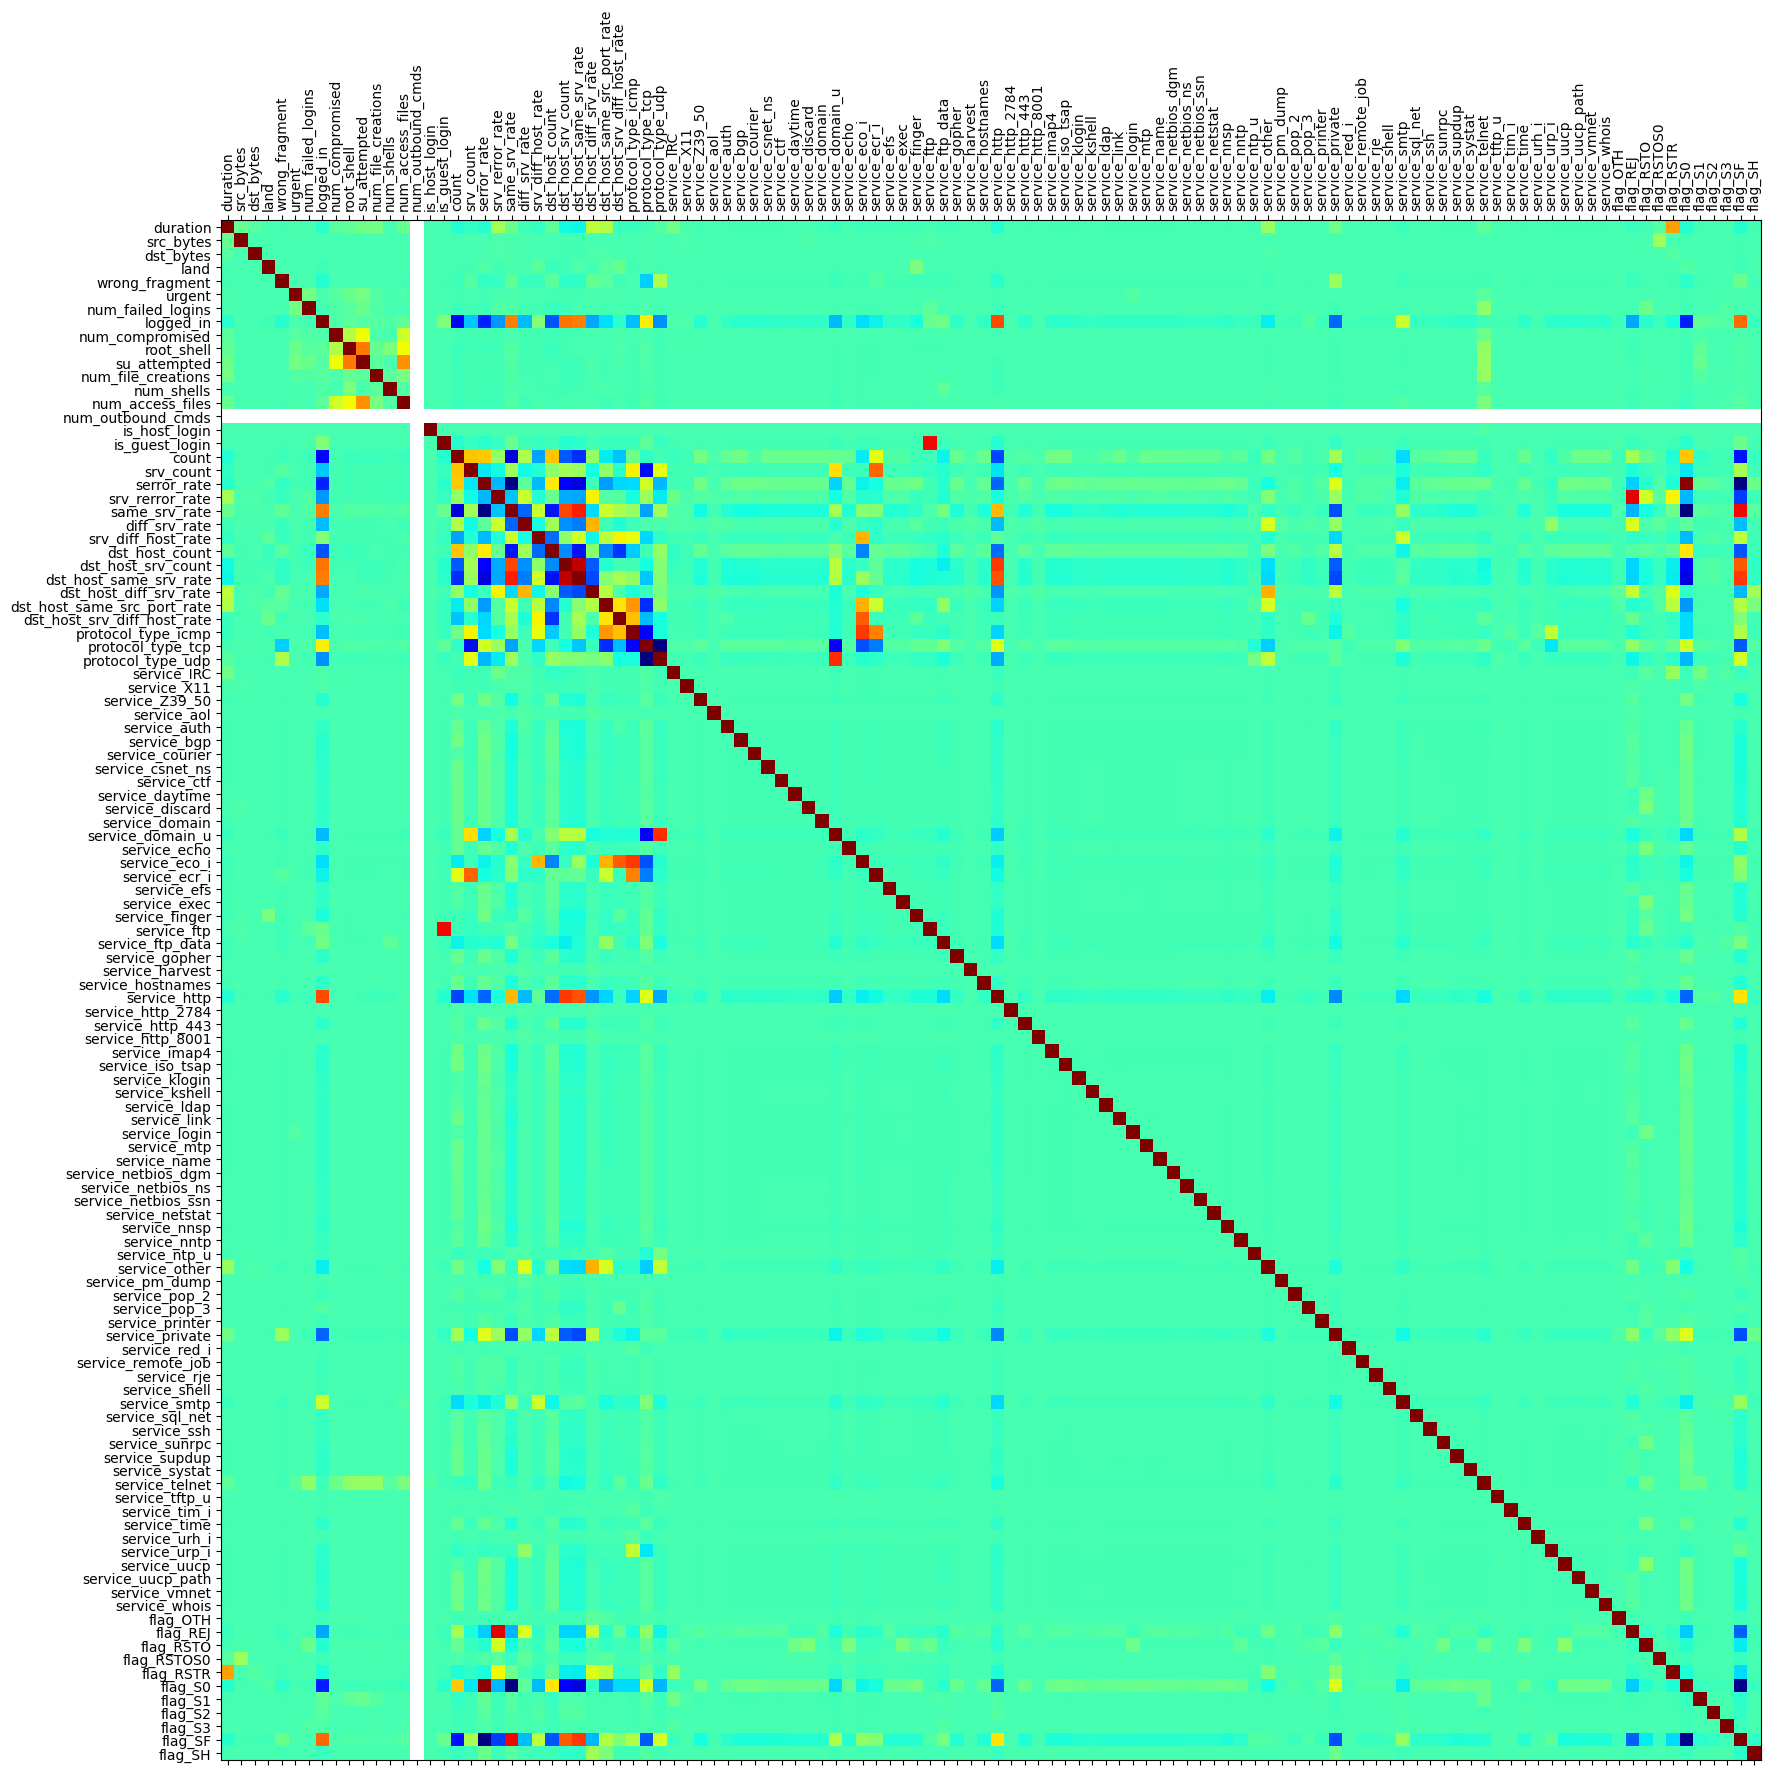

In [24]:
check_corr(20)

In [25]:
df.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,num_failed_logins,logged_in,num_compromised,root_shell,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
1,0,146,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
2,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
3,0,232,8153,0,0,0,0,1,0,0,...,False,False,False,False,False,False,False,False,True,False
4,0,199,420,0,0,0,0,1,0,0,...,False,False,False,False,False,False,False,False,True,False


In [26]:
df['labels'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [27]:
df.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell',
       ...
       'flag_REJ', 'flag_RSTO', 'flag_RSTOS0', 'flag_RSTR', 'flag_S0',
       'flag_S1', 'flag_S2', 'flag_S3', 'flag_SF', 'flag_SH'],
      dtype='object', length=115)

In [28]:
df['label_encoded'] = df['labels'].apply(lambda x: 0 if x == 'normal' else 1)

In [29]:
df.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,num_failed_logins,logged_in,num_compromised,root_shell,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,label_encoded
0,0,491,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,True,False,0
1,0,146,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,True,False,0
2,0,0,0,0,0,0,0,0,0,0,...,False,False,False,True,False,False,False,False,False,1
3,0,232,8153,0,0,0,0,1,0,0,...,False,False,False,False,False,False,False,True,False,0
4,0,199,420,0,0,0,0,1,0,0,...,False,False,False,False,False,False,False,True,False,0


In [30]:
df.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell',
       ...
       'flag_RSTO', 'flag_RSTOS0', 'flag_RSTR', 'flag_S0', 'flag_S1',
       'flag_S2', 'flag_S3', 'flag_SF', 'flag_SH', 'label_encoded'],
      dtype='object', length=116)

In [31]:
df.drop('labels', axis=1, inplace=True)

In [32]:
df.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell',
       ...
       'flag_RSTO', 'flag_RSTOS0', 'flag_RSTR', 'flag_S0', 'flag_S1',
       'flag_S2', 'flag_S3', 'flag_SF', 'flag_SH', 'label_encoded'],
      dtype='object', length=115)

In [33]:
df.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,num_failed_logins,logged_in,num_compromised,root_shell,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,label_encoded
0,0,491,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,True,False,0
1,0,146,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,True,False,0
2,0,0,0,0,0,0,0,0,0,0,...,False,False,False,True,False,False,False,False,False,1
3,0,232,8153,0,0,0,0,1,0,0,...,False,False,False,False,False,False,False,True,False,0
4,0,199,420,0,0,0,0,1,0,0,...,False,False,False,False,False,False,False,True,False,0


In [34]:
num_true=len(df.loc[df['label_encoded']==1])

In [35]:
print(f"attacks {num_true}")

attacks 58630


In [36]:
num_false=len(df.loc[df['label_encoded']==0])
print(f"Normal {num_false}")

Normal 67343


In [37]:
true_per=((num_true)/(num_true+num_false))*100
false_per=((num_false)/(num_false+num_true))*100
print(f"per of true is {true_per}")
print(f"per of false is {false_per}")

per of true is 46.54171925730117
per of false is 53.458280742698825


In [38]:
df.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell',
       ...
       'flag_RSTO', 'flag_RSTOS0', 'flag_RSTR', 'flag_S0', 'flag_S1',
       'flag_S2', 'flag_S3', 'flag_SF', 'flag_SH', 'label_encoded'],
      dtype='object', length=115)

In [39]:
X = df.drop('label_encoded', axis=1)
y = df['label_encoded']

In [40]:
print(X.select_dtypes(include='object').columns)

Index([], dtype='object')


In [41]:
print(df.columns.tolist())

['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'protocol_type_icmp', 'protocol_type_tcp', 'protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_harvest', 'serv

In [42]:
print(df.columns[:20])

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate'],
      dtype='object')


In [43]:
from sklearn.model_selection import train_test_split
input_columns = df.columns.drop('label_encoded')
output_columns = ['label_encoded']

x = df[input_columns].values
y = df[output_columns].values
y = y.ravel()

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [77]:

pd.DataFrame(x).to_csv("processed_input.csv", index=False)

In [78]:
model = RandomForestClassifier()   # or SVM
model.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [79]:
import joblib
joblib.dump((model, input_columns), "ids_model.pkl")

['ids_model.pkl']

In [80]:
print(x_train.shape)

(88181, 114)


In [45]:
print(y_train.shape)

(88181,)


In [46]:
print(x_test.shape)

(37792, 114)


In [47]:
print(y_test.shape)

(37792,)


In [48]:
print('{0:02f}% in training set'.format((len(x_train)/len(df.index))*100))
print('{0:02f}% in testing set'.format((len(x_test)/len(df.index))*100))

69.999921% in training set
30.000079% in testing set


In [49]:
print('training true:{0} ({1:0.2f}%)'.format(len(y_train[y_train[ : ]==1]),
                                             (len(y_train[y_train[ : ] ==1])/len(y_train)*100)))
print('training false:{0} ({1:0.2f}%)'.format(len(y_train[y_train[ : ]==0]),
                                             (len(y_train[y_train[ : ] ==0])/len(y_train)*100)))
print('Test true:{0} ({1:0.2f}%)'.format(len(y_test[y_test[ : ]==1]),
                                             (len(y_test[y_test[ : ] ==1])/len(y_test)*100)))
print('Test false:{0} ({1:0.2f}%)'.format(len(y_test[y_test[ : ]==0]),
                                             (len(y_test[y_test[ : ] ==0])/len(y_test)*100)))


training true:40921 (46.41%)
training false:47260 (53.59%)
Test true:17709 (46.86%)
Test false:20083 (53.14%)


In [50]:
len(df.columns)

115

In [51]:
df.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell',
       ...
       'flag_RSTO', 'flag_RSTOS0', 'flag_RSTR', 'flag_S0', 'flag_S1',
       'flag_S2', 'flag_S3', 'flag_SF', 'flag_SH', 'label_encoded'],
      dtype='object', length=115)

In [52]:
for col in df.columns:
    zero_count = (df[col] == 0).sum()
    print(f'number of rows with value 0 in {col} column is {zero_count}')

number of rows with value 0 in duration column is 115955
number of rows with value 0 in src_bytes column is 49392
number of rows with value 0 in dst_bytes column is 67967
number of rows with value 0 in land column is 125948
number of rows with value 0 in wrong_fragment column is 124883
number of rows with value 0 in urgent column is 125964
number of rows with value 0 in num_failed_logins column is 125851
number of rows with value 0 in logged_in column is 76121
number of rows with value 0 in num_compromised column is 124687
number of rows with value 0 in root_shell column is 125804
number of rows with value 0 in su_attempted column is 125893
number of rows with value 0 in num_file_creations column is 125686
number of rows with value 0 in num_shells column is 125926
number of rows with value 0 in num_access_files column is 125602
number of rows with value 0 in num_outbound_cmds column is 125973
number of rows with value 0 in is_host_login column is 125972
number of rows with value 0 in i

In [53]:
x_train[:5]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0.0,
        1.0, 1.0, 0.0, 1.0, 3, 196, 1.0, 0.0, 0.33, 0.27, False, True,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, True, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
        False],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 33, 15, 1.0,
        0.0, 0.45, 0.15, 0.0, 255, 15, 0.06, 0.08, 0.0, 0.0, False, True,
        False, False, False, False, False, False, False, Fal

In [54]:
x_test[:5]

array([[0, 36, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 0.0,
        0.0, 1.0, 0.0, 0.75, 67, 171, 1.0, 0.0, 1.0, 0.01, False, False,
        True, False, False, False, False, False, False, False, False,
        False, False, False, False, True, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, True,
        False],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 42, 11, 1.0,
        0.0, 0.26, 0.1, 0.0, 255, 44, 0.17, 0.05, 0.01, 0.0, False, True,
        False, False, False, False, False, False, False, F

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [56]:
y_train[0:5]

array([0, 1, 0, 0, 0])

In [57]:
y_train = y_train.astype(int).ravel()
y_test = y_test.astype(int).ravel()

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [59]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear')

svm_model.fit(x_train, y_train)

svm_pred = svm_model.predict(x_test)

print("SVM Results")
print("Accuracy :", accuracy_score(y_test, svm_pred))
print("Precision:", precision_score(y_test, svm_pred))
print("Recall   :", recall_score(y_test, svm_pred))
print("F1 Score :", f1_score(y_test, svm_pred))

SVM Results
Accuracy : 0.9729307790008468
Precision: 0.9809199907770348
Recall   : 0.9609238240442712
F1 Score : 0.9708189519924694


In [60]:
from sklearn.ensemble import RandomForestClassifier

# Create model
rf_model = RandomForestClassifier(random_state=42)

# Train
rf_model.fit(x_train, y_train)

# Predict
rf_pred = rf_model.predict(x_test)

# Evaluation
print("Random Forest Results")
print("Accuracy :", accuracy_score(y_test, rf_pred))
print("Precision:", precision_score(y_test, rf_pred))
print("Recall   :", recall_score(y_test, rf_pred))
print("F1 Score :", f1_score(y_test, rf_pred))


Random Forest Results
Accuracy : 0.9987034292972058
Precision: 0.9993214204931011
Recall   : 0.9979106668925405
F1 Score : 0.9986155454468397


In [61]:
from sklearn.neighbors import KNeighborsClassifier

# Create model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train model
knn_model.fit(x_train, y_train)

# Predictions
knn_pred = knn_model.predict(x_test)

# Evaluation
print("KNN Results")
print("Accuracy :", accuracy_score(y_test, knn_pred))
print("Precision:", precision_score(y_test, knn_pred))
print("Recall   :", recall_score(y_test, knn_pred))
print("F1 Score :", f1_score(y_test, knn_pred))


KNN Results
Accuracy : 0.9934642252328535
Precision: 0.9929426377597109
Recall   : 0.99311084759162
F1 Score : 0.993026735552356


In [62]:
import pandas as pd

results = pd.DataFrame({
    "Model": ["SVM", "Random Forest", "KNN"],
    "Accuracy": [
        accuracy_score(y_test, svm_pred),
        accuracy_score(y_test, rf_pred),
        accuracy_score(y_test, knn_pred)
    ],
    "Precision": [
        precision_score(y_test, svm_pred),
        precision_score(y_test, rf_pred),
        precision_score(y_test, knn_pred)
    ],
    "Recall": [
        recall_score(y_test, svm_pred),
        recall_score(y_test, rf_pred),
        recall_score(y_test, knn_pred)
    ],
    "F1 Score": [
        f1_score(y_test, svm_pred),
        f1_score(y_test, rf_pred),
        f1_score(y_test, knn_pred)
    ]
})

results

,Model,Accuracy,Precision,Recall,F1 Score
0,SVM,0.972931,0.980920,0.960924,0.970819
1,Random Forest,0.998703,0.999321,0.997911,0.998616
2,KNN,0.993464,0.992943,0.993111,0.993027


## random forest is best for our model

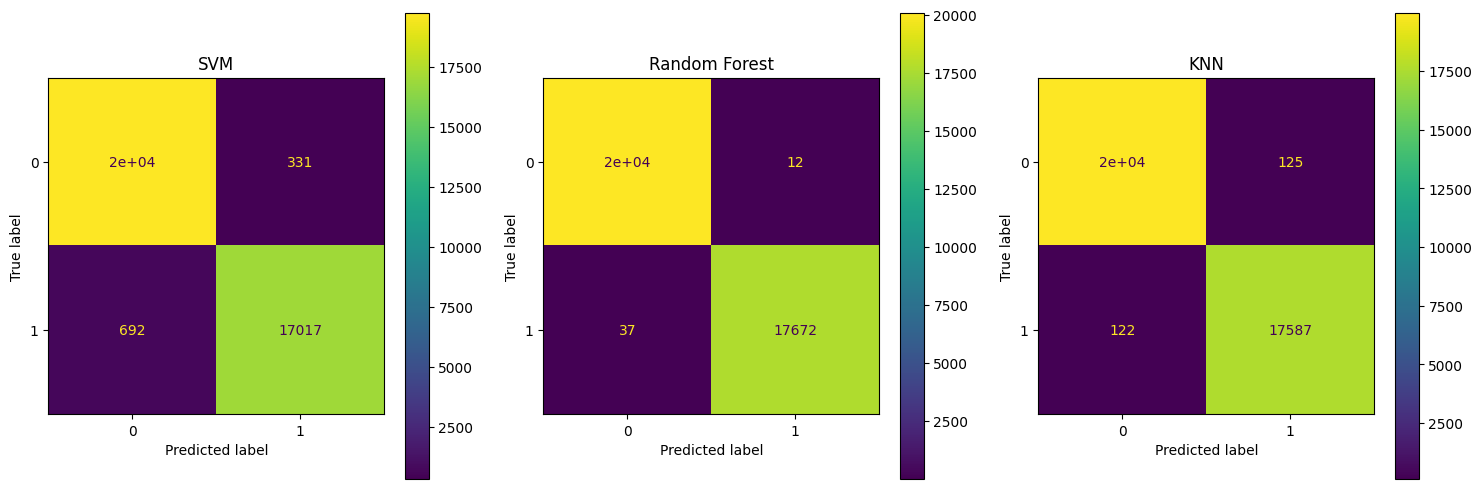

In [66]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create confusion matrices
cm_svm = confusion_matrix(y_test, svm_pred)
cm_rf  = confusion_matrix(y_test, rf_pred)
cm_knn = confusion_matrix(y_test, knn_pred)

# Create ONE combined figure
fig, axes = plt.subplots(1, 3, figsize=(15,5))

# --- SVM ---
ConfusionMatrixDisplay(cm_svm).plot(ax=axes[0])
axes[0].set_title("SVM")

# --- Random Forest ---
ConfusionMatrixDisplay(cm_rf).plot(ax=axes[1])
axes[1].set_title("Random Forest")

# --- KNN ---
ConfusionMatrixDisplay(cm_knn).plot(ax=axes[2])
axes[2].set_title("KNN")

plt.tight_layout()
plt.show()


## The experimental results demonstrate that machine learning–based intrusion detection significantly improves network security performance. Among the evaluated models, Random Forest achieved the highest accuracy and lowest false detection rate, making it the most suitable model for this IDS implementation.